In [115]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Read dataset
smoke = pd.read_csv("smoking_death.csv")
deaths = smoke[' deaths'].values
smoke.describe()

,age,smoke_cigars_pipe,smoke_both,smoke_cigarettes,population,deaths
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,5.000000,0.250000,0.250000,0.250000,1558.944444,253.611111
std,2.618615,0.439155,0.439155,0.439155,1562.232175,262.597495
min,1.000000,0.000000,0.000000,0.000000,98.000000,2.000000
25%,3.000000,0.000000,0.000000,0.000000,369.250000,100.500000
50%,5.000000,0.000000,0.000000,0.000000,858.500000,171.500000
75%,7.000000,0.250000,0.250000,0.250000,2305.500000,274.000000
max,9.000000,1.000000,1.000000,1.000000,6052.000000,1001.000000


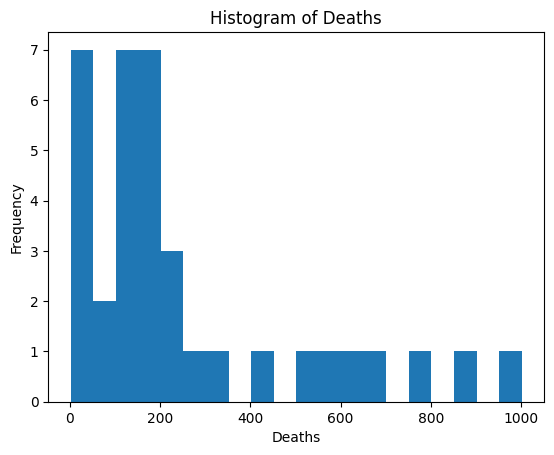

In [116]:
# Plot the histogram of death
plt.hist(deaths, bins=20)
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.title('Histogram of Deaths')
plt.show()

1. Provide posterior inference for a column data with a PyMC normal-gamma specification.

In [122]:
import pymc as pm
alpha, beta = 2, 1 / 2
normal_gamma_smoke_model = pm.model()
with normal_gamma_smoke_model:
  tau = pm.Gamma('tau', alpha=alpha, beta=beta)
  normal = pm.Normal('normal', mo=np.mean(deaths), tau=tau, observed=deaths)

Warning: Duplicate qualified model declaration of 'Tool'. Previous definition: <class 'bokeh.models.tools.Tool'>

In [ ]:
with normal_gamma_smoke_model:
  idata_HMC = pm.sample() # default is the NUTS implementation of HMC

In [123]:
import arviz as az
fig,ax = plt.subplots(2,4,figsize=(14,3))
az.plot_trace(idata_HMC, axes=ax[:2,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ')

Warning: Duplicate qualified model declaration of 'Tool'. Previous definition: <class 'bokeh.models.tools.Tool'>

In [124]:
# Provide posterior inference
idata_HMC.posterior['phi'].values.flatten().shape[-1]
az.summary(idata_HMC, round_to=2)

NameError: name 'idata_HMC' is not defined

2. Find a different column of data for which a normal-gamma specification isn’t justified

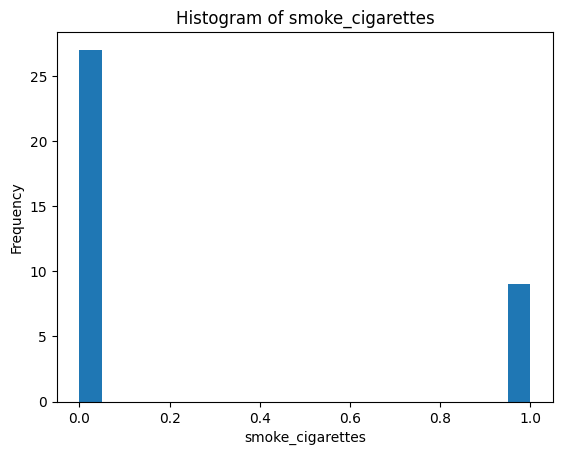

In [125]:
smoke_cigarettes = smoke[' smoke_cigarettes'].values
# Plot the histogram of smoke_cigarettes
plt.hist(smoke_cigarettes, bins=20)
plt.xlabel('smoke_cigarettes')
plt.ylabel('Frequency')
plt.title('Histogram of smoke_cigarettes')
plt.show()

<Axes: >

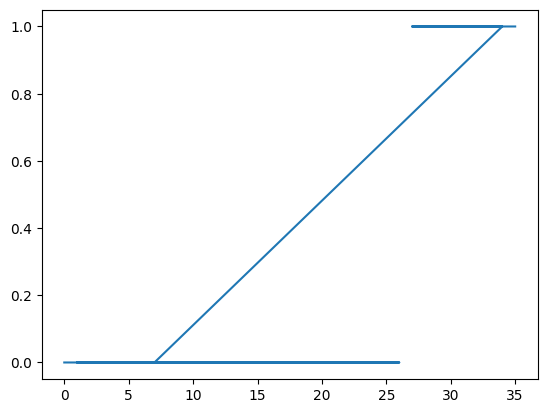

In [126]:
smoke[' smoke_cigarettes'].sort_values().plot()

3. Create a different PyMC specification that IS appropriate for this new data column:
• here are your PyMC choices for continuous distributions
• here are your PyMC choices for discrete distributions

In [127]:
alpha, beta = 2, 1 / 2
normal_gamma_cigarettes_model = pm.model()
with normal_gamma_cigarettes_model:
    mu = pm.Normal('mu', mu=np.mean(smoke_cigarettes), sd=np.std(smoke_cigarettes))
    phi = pm.Gamma("phi", alpha=alpha, beta=beta)
    smoke_obs = pm.Normal('observed', mu=mu,  sigma=1/phi**0.5, observed=smoke_cigarettes)

NameError: name 'pm' is not defined

In [121]:
with normal_gamma_cigarettes_model:
  idata_HMC2 = pm.sample() # default is the NUTS implementation of HMC

NameError: name 'normal_gamma_cigarettes_model' is not defined

In [ ]:
import arviz as az
fig,ax = plt.subplots(2,4,figsize=(14,3))
az.plot_trace(idata_HMC, axes=ax[:2,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC2).items()}, end=' | ')

4. Provide posterior inference for the parameters of your new specification given the column of non-normal data using PyMC and provide an analysis of the MCMC chains.

In [128]:
idata_HMC2.posterior['phi'].values.flatten().shape[-1])
az.summary(idata_HMC2, round_to=2)

SyntaxError: unmatched ')' (<ipython-input-128-12d9e1043977>, line 1)